<a href="https://colab.research.google.com/github/Rishabh9559/Data_science/blob/main/Phase%202%3A%20Machine%20Learning%20for%20Data%20Science/SVM/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

SVM = Max-Margin Classifier that can handle both linear and non-linear classification.

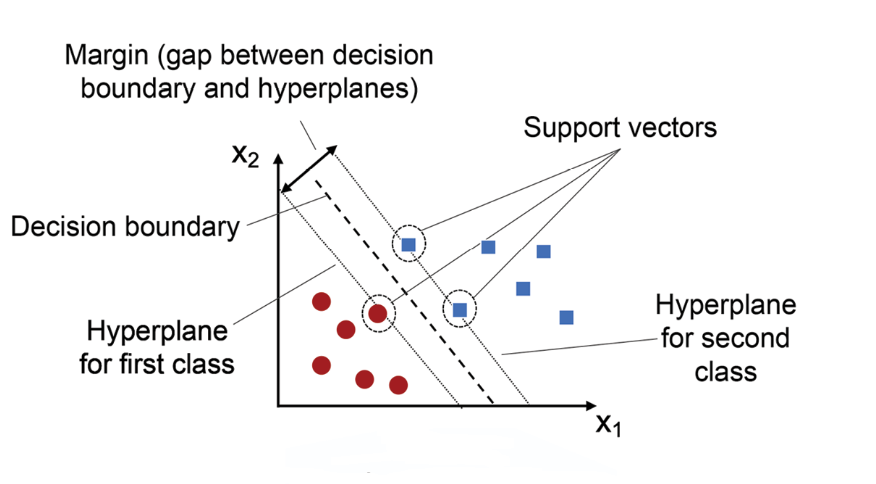

Support Vector Machine (**SVM**) is a **supervised machine learning algorithm** used for **classification** and **regression** tasks, but it is mostly applied in classification.


###  Core Idea

SVM tries to find the **best decision boundary (hyperplane)** that separates data points of different classes with the **maximum margin**.

* The margin is the distance between the hyperplane and the nearest data points from each class (called **support vectors**).
* A larger margin → better generalization on unseen data.



###  How it Works

1. **Linear case**: If data is linearly separable, SVM finds the straight line (in 2D), plane (in 3D), or hyperplane (in higher dimensions) that best separates classes.
2. **Non-linear case**: If data isn’t linearly separable, SVM uses the **kernel trick** to transform data into higher dimensions where it becomes separable.

Common **kernels**:

* **Linear kernel** – for linearly separable data.
* **Polynomial kernel** – captures polynomial relationships.
* **RBF (Radial Basis Function) kernel** – widely used for non-linear decision boundaries.
* **Sigmoid kernel** – similar to neural networks’ activation functions.



###  Advantages

* Works well in **high-dimensional spaces**.
* Effective when there is a **clear margin of separation**.
* Memory efficient (only uses support vectors).



###  Limitations

* Not very efficient with **large datasets** (computationally heavy).
* Performance depends on **choice of kernel and hyperparameters**.
* Less effective if classes overlap heavily.


###  Example

Imagine separating red circles and blue squares on a 2D graph:

* Logistic Regression: tries to find a line that separates them.
* SVM: finds the **line with the maximum margin** between closest points (support vectors).



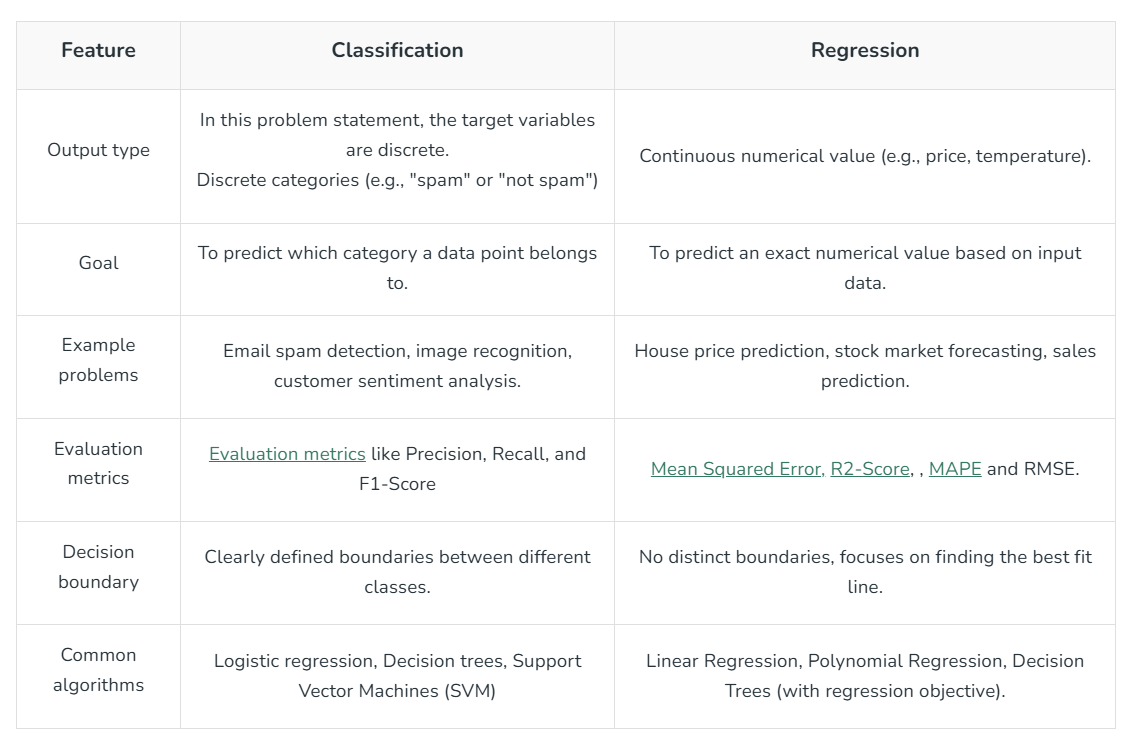



##  1. Based on Problem Type

### **(a) Classification SVM**

* **Linear SVM**

  * Works when data is linearly separable.
  * Finds the best straight line (or hyperplane) to classify data.

* **Non-Linear SVM**

  * Uses **kernel trick** to map data into higher dimensions.
  * Handles complex, non-linear boundaries.

Example: Image classification, spam filtering.



### **(b) Regression SVM (SVR – Support Vector Regression)**

* Instead of classifying, SVM predicts a continuous value.
* It tries to fit the best line within a margin (called **ε-insensitive tube**).
* Ignores errors inside the margin, only penalizes points outside it.

 Example: Stock price prediction, demand forecasting.



##  2. Based on Margin

* **Hard Margin SVM**

  * Assumes data is perfectly separable.
  * No misclassification allowed.
  * Works only if there’s a clear gap between classes.

* **Soft Margin SVM**

  * Allows some misclassification using **slack variables**.
  * More practical for noisy or overlapping data.
  * Controlled by parameter **C** (penalty).



##  3. Based on Kernel Function

* **Linear Kernel SVM** → straight-line boundaries.
* **Polynomial Kernel SVM** → polynomial decision boundaries.
* **RBF (Gaussian) Kernel SVM** → most common for non-linear problems.
* **Sigmoid Kernel SVM** → similar to neural networks.

